# 誤差逆伝播法を用いた学習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.layers import TwoLayerNet

In [2]:
# Load the MNIST dataset
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

train = X_train/255
test = X_test/255
train = train.reshape(-1, 28*28)
test = test.reshape(-1, 28*28)
train_labels = lb.fit_transform(y_train)
test_labels = lb.fit_transform(y_test)

In [3]:
x = train[:1000,:]
t = train_labels[:1000,:]

epochs = 100
batch_size = 25
lr = 0.01

# 繰り返し回数
xsize = x.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

# 2層NNのオブジェクト生成
tnet = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    print("epoch=%s"%epoch)
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_train = x[mask]
        t_train = t[mask]
        
        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = tnet.gradient(x_train, t_train)

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    ## 学習経過の記録
    
    # 訓練データにおけるloss
    train_loss.append(tnet.loss(x,  t))
    
    # テストデータにおけるloss
    test_loss.append(tnet.loss(test, test_labels))
    
    # 訓練データにて精度を確認
    train_accuracy.append(tnet.accuracy(x, t))

    # テストデータにて精度を算出
    test_accuracy.append(tnet.accuracy(test, test_labels))

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29
epoch=30
epoch=31
epoch=32
epoch=33
epoch=34
epoch=35
epoch=36
epoch=37
epoch=38
epoch=39
epoch=40
epoch=41
epoch=42
epoch=43
epoch=44
epoch=45
epoch=46
epoch=47
epoch=48
epoch=49
epoch=50
epoch=51
epoch=52
epoch=53
epoch=54
epoch=55
epoch=56
epoch=57
epoch=58
epoch=59
epoch=60
epoch=61
epoch=62
epoch=63
epoch=64
epoch=65
epoch=66
epoch=67
epoch=68
epoch=69
epoch=70
epoch=71
epoch=72
epoch=73
epoch=74
epoch=75
epoch=76
epoch=77
epoch=78
epoch=79
epoch=80
epoch=81
epoch=82
epoch=83
epoch=84
epoch=85
epoch=86
epoch=87
epoch=88
epoch=89
epoch=90
epoch=91
epoch=92
epoch=93
epoch=94
epoch=95
epoch=96
epoch=97
epoch=98
epoch=99


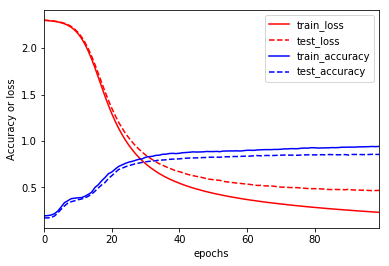

In [4]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot(style=['r-', 'r--', 'b-', 'b--'])
plt.ylabel("Accuracy or loss")
plt.xlabel("epochs")
plt.show()